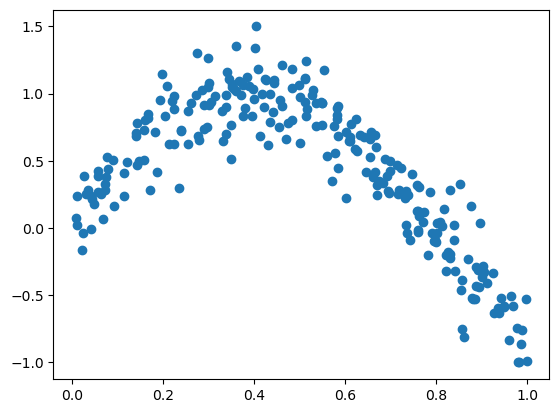

In [251]:
#per ogni y ho una funzione polinomiale => matrice

import numpy as np
import matplotlib.pyplot as plt

X = np.array([np.random.uniform(0, 1, size=250)]).transpose()

Y = np.sin(X*4) + np.array([np.random.normal(0, 0.2, 250)]).transpose()

plt.scatter(X, Y)
plt.show()

In [252]:
features = np.array([lambda _ : 1, lambda x : x, lambda x : x**2, lambda x : x**3, lambda x : x**4, lambda x : x**5, lambda x : x**6])
weights = np.zeros((len(features), 1), dtype='float')
epochs = 10000
alpha = 0.1
lmbd = 0.000001

In [253]:
for _ in range(epochs):
    phi = np.array([[f(x) for f in features] for [x] in X], dtype='float')
    pred = np.matmul(phi, weights, dtype='float')
    err = Y - pred
    
    grad = -2 * np.matmul(phi.transpose(), err, dtype='float')
    grad_sq = np.square(grad)
    norm_factor = np.sqrt(grad_sq.sum(axis=0, dtype='float'))

    weights = (1 - 2 * alpha * lmbd) * weights - alpha * (grad /norm_factor)

print(weights)

[[ 0.01799563]
 [ 4.15474201]
 [-3.28806488]
 [-3.07830985]
 [-1.0970662 ]
 [ 0.66072923]
 [ 1.7549066 ]]


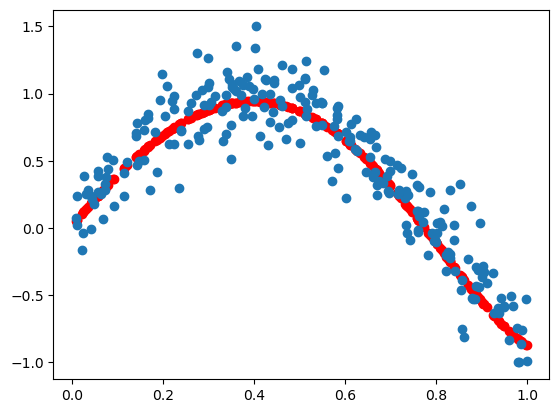

In [254]:

pred = np.matmul(phi, weights, dtype='float').sum(axis=1, dtype='float')
plt.scatter(X, pred, color="red")
plt.scatter(X, Y)